<a href="https://colab.research.google.com/github/joshIsac/computervisionlab/blob/main/2348523_lab2_affinetransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Affine transformation :is A transformation that can be expressed in the form of a matrix multiplication  (linear transformation) followed by a vector addition (translation).
we can use an Affine Transformation to express:

Rotations (linear transformation)
Translations (vector addition)
Scale operations (linear transformation)
you can see that, in essence, an Affine Transformation represents a relation between two images.
it is represented int the form of 2*3 matrix


In [96]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage.io import imread
#Scikit-image, or skimage, is an open source Python package designed for image preprocessing.
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

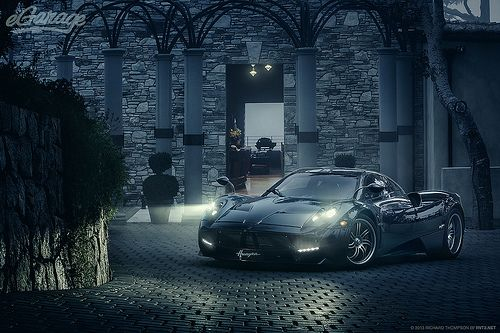

In [97]:
image_path="/content/drive/MyDrive/pagani huayra.jpg"
img = cv2.imread(image_path)
cv2_imshow(img)

In [98]:
print(img.shape)

(333, 500, 3)


In [99]:
#extracting shape using
h, w, c = img.shape
print("Dimensions of the image is:nnHeight:", h, "pixelsnWidth:", w, "pixels Number of Channels:", c)

Dimensions of the image is:nnHeight: 333 pixelsnWidth: 500 pixels Number of Channels: 3


In [100]:
print(type(img))

<class 'numpy.ndarray'>


In [101]:
print(img.dtype)

uint8


In [102]:
#Image pixel values

print(img)

[[[ 13   5   5]
  [ 14   6   6]
  [ 15   8   5]
  ...
  [133 123 106]
  [132 122 105]
  [131 121 104]]

 [[ 13   5   5]
  [ 14   6   6]
  [ 15   8   5]
  ...
  [133 123 106]
  [132 122 105]
  [131 121 104]]

 [[ 13   5   5]
  [ 14   6   6]
  [ 15   8   5]
  ...
  [134 124 107]
  [133 123 106]
  [132 122 105]]

 ...

 [[ 16   8   1]
  [ 16   8   1]
  [ 16   8   1]
  ...
  [ 20  11   2]
  [ 20  11   2]
  [ 21  12   3]]

 [[ 15   7   0]
  [ 15   7   0]
  [ 15   7   0]
  ...
  [ 20  11   2]
  [ 20  11   2]
  [ 19  10   1]]

 [[ 17   9   2]
  [ 17   9   2]
  [ 17   9   2]
  ...
  [ 22  13   4]
  [ 20  11   2]
  [ 19  10   1]]]


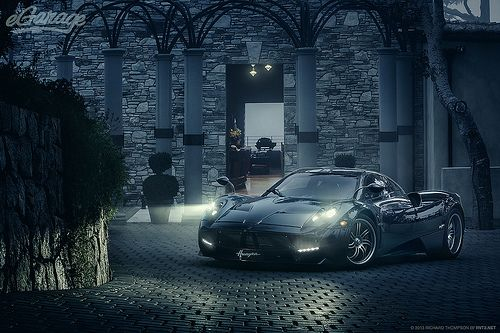

In [103]:
#identity transform
ident=np.float32([[1,0,0],[0,1,0]])
identity_transformed_image = cv2.warpAffine(img, ident, (img.shape[1], img.shape[0]))
cv2_imshow(identity_transformed_image)

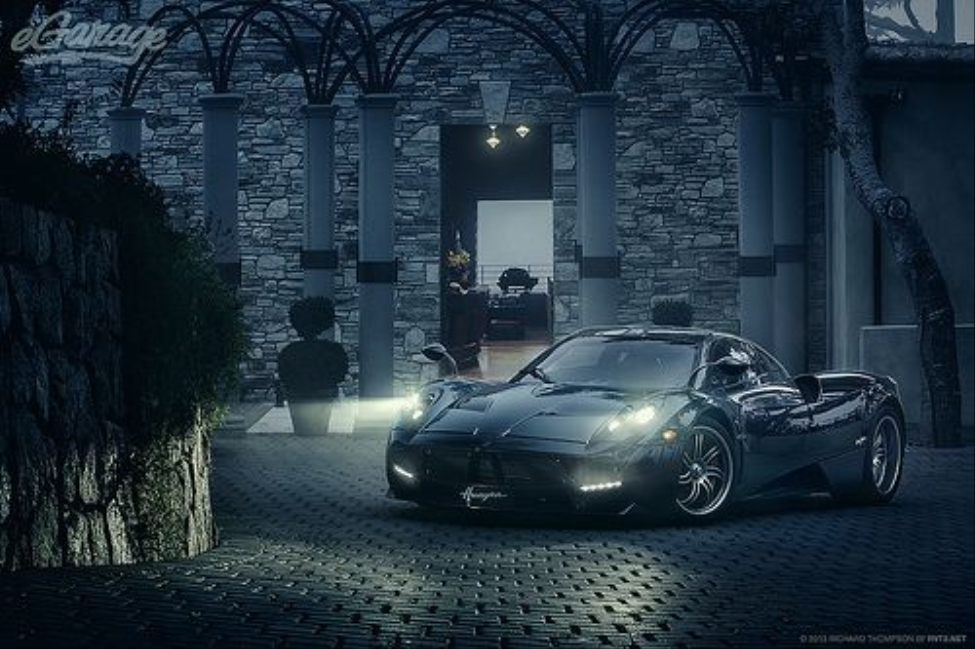

In [112]:
#Scale the image
s_x, s_y = 1.95, 1.95
scale_matrix = np.float32([[s_x, 0, 0],
                           [0,s_y, 0]])
scaled_transformed_image = cv2.warpAffine(img, scale_matrix, (int(img.shape[1]*s_x), int(img.shape[0]*s_y)))
cv2_imshow(scaled_transformed_image)

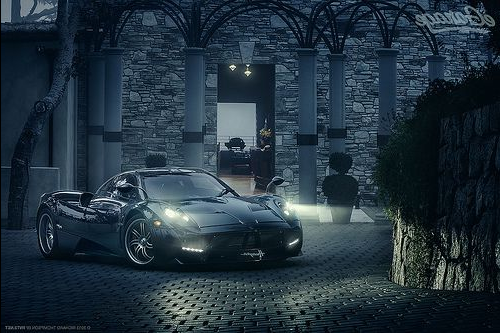

In [105]:
# Reflect transformation along x-axis
reflect_matrix = np.float32([[-1, 0, img.shape[1]],
                             [0, 1, 0]])
reflect_transformed_image = cv2.warpAffine(img, reflect_matrix, (img.shape[1], img.shape[0]))
cv2_imshow(reflect_transformed_image)

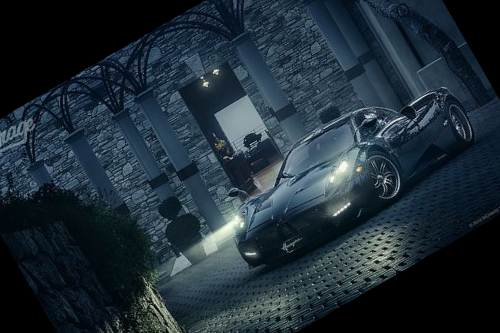

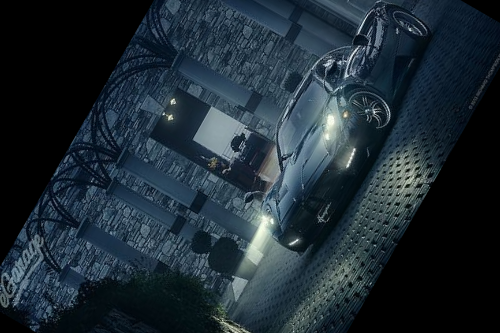

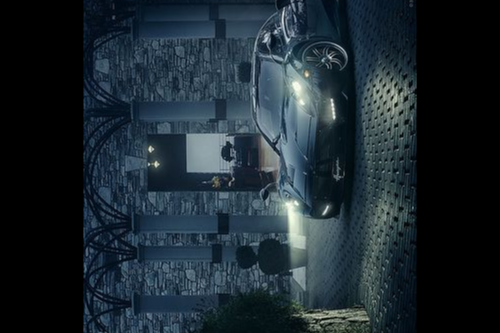

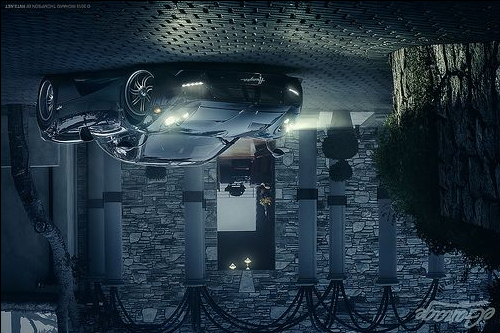

In [106]:
height, width = img.shape[:2]
# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)

# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix1 = cv2.getRotationMatrix2D(center=center, angle=30, scale=1)
rotate_matrix2 = cv2.getRotationMatrix2D(center=center, angle=60, scale=1)
rotate_matrix3 = cv2.getRotationMatrix2D(center=center, angle=90, scale=1)
rotate_matrix4 = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)
# rotate the image using cv2.warpAffine
rotated_image1 = cv2.warpAffine(src=img, M=rotate_matrix1, dsize=(width, height))
rotated_image2= cv2.warpAffine(src=img, M=rotate_matrix2, dsize=(width, height))
rotated_image3= cv2.warpAffine(src=img, M=rotate_matrix3, dsize=(width, height))
rotated_image4= cv2.warpAffine(src=img, M=rotate_matrix4, dsize=(width, height))

cv2_imshow(rotated_image1)
cv2_imshow(rotated_image2)
cv2_imshow(rotated_image3)
cv2_imshow(rotated_image4)

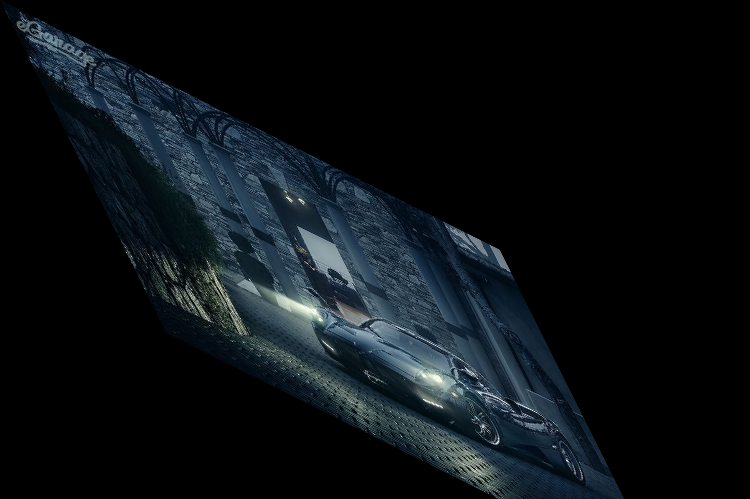

In [107]:
shear_matrix = np.float32([[1, 0.5, 0],
                           [0.5, 1, 0]])
sheared_transformed_image = cv2.warpAffine(img, shear_matrix, (int(img.shape[1]*1.5), int(img.shape[0]*1.5)))
cv2_imshow(sheared_transformed_image)

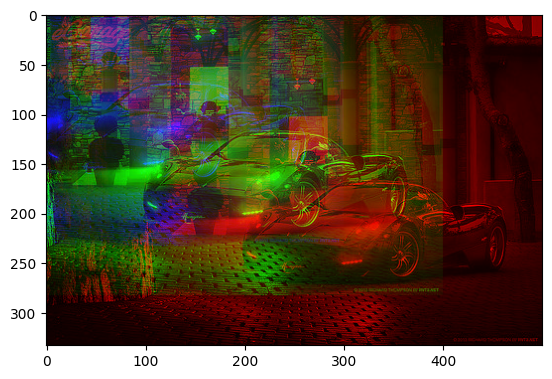

In [108]:
#Apply reflection transform :a photographic method that captures a subject's shape and colour to reveal surface information invisible under normal examination.
translate=np.array([[1,0,50],[0,1,100],[0,0,1]])
img2=ndi.affine_transform(img,translate)
#plotting the image
plt.imshow(img2)